***

<div align="center">
  <h3> Desarrollo de un gestor de inteligencia colectiva y un marco de trabajo para el aprendizaje a través de la resolución colaborativa de      problemas en entornos educativos transmediales </h3>
  <h4> Reporte técnico de Análisis de Datos. </h4>
  <h5> Validación e implementación de algoritmos que implementen técnicas de reducción de la dimensionalidad bajo el lenguaje de programación Julia </h5>
  <h3> RT - 006 </h3>
  <h3> JOHN FABER FLÓREZ VASCO - MÓDULO DE DATOS - GIANT </h3>
</div>

***

<div align="center">
  <h2> RESUMEN </h2>
</div>

<p style='text-align: justify;'> 
  Este reporte técnico tiene como objetivo evidenciar los algoritmos que permiten reducir la dimensionalidad de un conjunto de datos que apoyan el proceso de aprendizaje automático, creando una serie de algorítmos que posteriormente van a ser implementados y validados con el conjunto de datos que se obtengan del gestor de inteligencia colectiva GIANT. Se va a tener en cuenta un conjunto de datos que permita validar los algoritmos más utilizados para reducir las dimensionalidades e identificar tendencias en el conjunto de datos
</p>

<div align="center">
  <h2>INTRODUCCIÓN</h2>
</div>
<p style='text-align: justify;'> 

  En aprendizaje automático y estadísticas se aplica la reducción de dimensionalidades, el cual es el proceso de reducción del número de variables aleatorias que se trate y se puede dividir en selección de función y extracción de función. La extracción de características transforma los datos que se encuentran en el espacio de altas dimensiones para un espacio de menor dimensión. algunas de las ventajas de reducir dimensiones son las siguientes:
  
<ul>
    <li> Reduce el espacio de tiempo y almacenamiento requerido. </li>
    <li> La eliminación de multicolinealidad mejora el rendimiento del modelo de aprendizaje automático. </li>
    <li> Se hace más fácil de visualizar los datos cuando se reduce a dimensiones muy bajas tales como 2D o 3 </li>
</ul>
  
Teniendo en cuenta que al finalizar las distintas iteraciones que se van a realizar en el gestor de inteligencia GIANT, desde el módulo de datos es indispensable contar con todos aquellos elementos necesarios para realizar la correcta tarea de aprendizaje automático, por ello, al momento de realizar el análisis y comportmaiento de los datos es priotirario contar con algoritmos que permitan validar e identificar la dinamica de los datos realizando procesos de reducción de dimensionalidades. 

Vamos a evidenciar bajo un conjunto de datos de prueba como se puede reducir las dimensiones de dicho conjunto y aplicando las siguientes tres técnicas en el lenguaje de programación Julia:

<ul>
  <li>PCA: Análisis de componentes principales </li>
  <li> T-sne: Incrustación de vecinos estocásticos distribuidos en T </li>
  <li> UMAP: Aproximación y proyección múltiple uniforme </li>
<ul>
  
<p style='text-align: justify;'> 

<div align="center">
  <h2> 1. IMPORTANDO PAQUETES Y CONFIGURACIÓN DEL ENTORNO  </h2>
</div>

In [6]:
import Pkg; 
Pkg.add("Pkg")

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


<div align="center">
  <h2> 2. CARGANDO LOS DATOS  </h2>
</div>
<p style='text-align: justify;'> 
  Utilizaremos un conjunto de datos del paquete VegaDatasets. El conjunto de datos trata sobre especificaciones de más de 400 modelos de automóviles.
</p>

In [33]:
Pkg.build("CodecZlib")
Pkg.add("VegaDatasets")
using VegaDatasets


   Building CodecZlib → `~/.julia/packages/CodecZlib/5t9zO/deps/build.log`
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
┌ Info: Precompiling VegaDatasets [0ae4a718-28b7-58ec-9efb-cded64d6d5b4]
└ @ Base loading.jl:1260


In [35]:
Pkg.add("DataFrames")
using DataFrames

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
┌ Info: Precompiling DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
└ @ Base loading.jl:1260


In [36]:
C = DataFrame(VegaDatasets.dataset("cars"))

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower
,String,Float64⍰,Int64,Float64,Int64⍰
1,chevrolet chevelle malibu,18.0,8,307.0,130
2,buick skylark 320,15.0,8,350.0,165
3,plymouth satellite,18.0,8,318.0,150
4,amc rebel sst,16.0,8,304.0,150
5,ford torino,17.0,8,302.0,140
6,ford galaxie 500,15.0,8,429.0,198
7,chevrolet impala,14.0,8,454.0,220
8,plymouth fury iii,14.0,8,440.0,215
9,pontiac catalina,14.0,8,455.0,225


In [37]:
dropmissing!(C)
M = Matrix(C[:,2:7])
names(C)

9-element Array{Symbol,1}:
 :Name
 :Miles_per_Gallon
 :Cylinders
 :Displacement
 :Horsepower
 :Weight_in_lbs
 :Acceleration
 :Year
 :Origin

In [39]:
Pkg.add("MLBase")
using MLBase

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
┌ Info: Precompiling MLBase [f0e99cf1-93fa-52ec-9ecc-5026115318e0]
└ @ Base loading.jl:1260


In [40]:
car_origin = C[:,:Origin]
carmap = labelmap(car_origin) #from MLBase
uniqueids = labelencode(carmap,car_origin)

392-element Array{Int64,1}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 1
 1
 1
 1
 2
 1
 1
 1
 3
 1
 1
 1

<div align="center">
  <h2> 3. REDUCCIÓN DE DIMENSIONALIDAD </h2>
</div>
<p style='text-align: justify;' > 
  Como su nombre lo indica, la reducción de dimensionalidad es la idea de reducir un conjunto de características a un número mucho menor. La reducción de la dimensionalidad se usa a menudo en la visualización de conjuntos de datos para tratar de detectar muestras que son similares. Cubriremos las técnicas de reducción de tres dimensiones utilizando las siguientes técnicas:
<ul>
<li> PCA </li>
<li> t-SNE </li>
<li> umap </li>
</ul>
</p>

<div align="center">
  <h2> 3.1 PCA </h2>
</div>
<p style='text-align: justify;' >
  PCA es una técnica utilizada para describir un conjunto de datos en términos de nuevas variables («componentes») no correlacionadas. Los componentes se ordenan por la cantidad de varianza original que describen, por lo que la técnica es útil para reducir la dimensionalidad de un conjunto de datos.

Técnicamente, el PCA busca la proyección según la cual los datos queden mejor representados en términos de mínimos cuadrados. Esta convierte un conjunto de observaciones de variables posiblemente correlacionadas en un conjunto de valores de variables sin correlación lineal llamadas componentes principales.
 Primero vamos a centrar los datos
</p>
  

In [46]:
Pkg.add("StatsBase")
Pkg.add("Statistics")
using StatsBase
using Statistics

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


In [47]:
# center and normalize the data
data = M
data = (data .- mean(data,dims = 1))./ std(data,dims=1)

392×6 Array{Float64,2}:
 -0.697747   1.48205    1.07591    0.663285   0.619748   -1.28362
 -1.08212    1.48205    1.48683    1.57258    0.842258   -1.46485
 -0.697747   1.48205    1.18103    1.18288    0.539692   -1.64609
 -0.953992   1.48205    1.04725    1.18288    0.53616    -1.28362
 -0.82587    1.48205    1.02813    0.923085   0.554997   -1.82732
 -1.08212    1.48205    2.24177    2.42992    1.60515    -2.00855
 -1.21024    1.48205    2.48068    3.00148    1.62045    -2.37102
 -1.21024    1.48205    2.34689    2.87158    1.57101    -2.55226
 -1.21024    1.48205    2.49023    3.13138    1.70404    -2.00855
 -1.08212    1.48205    1.86908    2.22208    1.02709    -2.55226
 -1.08212    1.48205    1.80219    1.70248    0.689209   -2.00855
 -1.21024    1.48205    1.39127    1.44268    0.743365   -2.73349
 -1.08212    1.48205    1.96464    1.18288    0.922314   -2.18979
  ⋮                                                       ⋮
  0.199113   0.309571  -0.128168   0.143685  -0.0383613   


<h5> PCA espera que cada columna sea una observación, por lo que utilizaremos la transposición de la matriz. </h5>

In [48]:
# cada auto es ahora una columna, PCA toma características por matriz de muestras
data'

6×392 LinearAlgebra.Adjoint{Float64,Array{Float64,2}}:
 -0.697747  -1.08212   -0.697747  …   1.09597    0.583482   0.967851
  1.48205    1.48205    1.48205      -0.862911  -0.862911  -0.862911
  1.07591    1.48683    1.18103      -0.567753  -0.711097  -0.720653
  0.663285   1.57258    1.18288      -0.531795  -0.661694  -0.583754
  0.619748   0.842258   0.539692     -0.803605  -0.415097  -0.303253
 -1.28362   -1.46485   -1.64609   …  -1.4286     1.10867    1.39865

<h5> Primero, ajustaremos el modelo a través de PCA. maxoutdim son las dimensiones de salida, queremos que sea 2 en este caso. </h5>

In [50]:
Pkg.add("MultivariateStats")
using MultivariateStats

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
  [6f286f6a] + MultivariateStats v0.7.0
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
┌ Info: Precompiling MultivariateStats [6f286f6a-111f-5878-ab1e-185364afe411]
└ @ Base loading.jl:1260


In [51]:
p = fit(PCA,data',maxoutdim=2)

PCA(indim = 6, outdim = 2, principalratio = 0.9194828785333573)

<h5> Podemos obtener la matriz de proyección llamando a la función projection </h5>

In [52]:
P = projection(p)

6×2 Array{Float64,2}:
  0.398973  -0.244835
 -0.430615   0.148314
 -0.443531   0.108497
 -0.434122  -0.166158
 -0.430103   0.286095
  0.291926   0.892652

<h5> 
Ahora que tenemos la matriz de proyección, P, podemos aplicarla en un automóvil de la siguiente manera: </h5>

In [53]:
P'*(data[1,:]-mean(p))

2-element Array{Float64,1}:
 -2.3230016965226916
 -0.5713519642644692


O podemos transformar todos los datos a través de la función de transformación.

In [54]:
Yte = MultivariateStats.transform(p, data')

2×392 Array{Float64,2}:
 -2.323     -3.20196  -2.66658   -2.60214   …   1.22011  1.70921   1.86951
 -0.571352  -0.68187  -0.992744  -0.621975     -1.87471  0.632857  0.815607

También podemos retroceder de dos dimensiones a 6 dimensiones, a través de la función de reconstrucción ... Pero esta vez, será aproximado.

In [55]:
# reconstruir observaciones de prueba (aproximadamente)
Xr = reconstruct(p, Yte)

6×392 Array{Float64,2}:
 -0.786928  -1.11055  -0.820834  …   0.945785   0.526984   0.546196
  0.91558    1.27768   1.00103      -0.803445  -0.64215   -0.684075
  0.968334   1.34619   1.075        -0.744559  -0.689425  -0.740696
  1.1034     1.50334   1.32257      -0.218179  -0.847159  -0.947116
  0.835669   1.18209   0.862883     -1.06112   -0.554079  -0.570742
 -1.18816   -1.54341  -1.66462   …  -1.31728    1.06388    1.27381

In [57]:
Pkg.add("LinearAlgebra")
using LinearAlgebra

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
  [37e2e46d] + LinearAlgebra 
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


In [58]:
norm(Xr-data')

13.743841055569009


Finalmente, generaremos un diagrama de dispersión de los autos:

In [59]:
Pkg.add("Plots")
using Plots

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


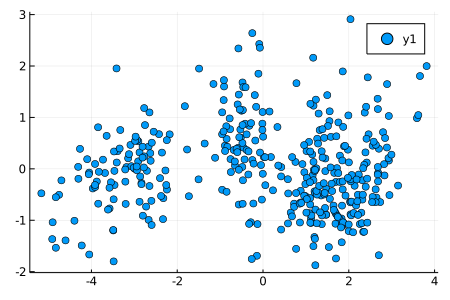

In [62]:
Plots.scatter(Yte[1,:],Yte[2,:],size=(450,300))

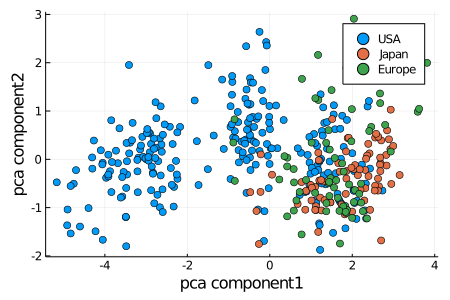

In [63]:
Plots.scatter(Yte[1,car_origin.=="USA"],Yte[2,car_origin.=="USA"],color=1,label="USA")
Plots.xlabel!("pca component1")
Plots.ylabel!("pca component2")
Plots.scatter!(Yte[1,car_origin.=="Japan"],Yte[2,car_origin.=="Japan"],color=2,label="Japan")
Plots.scatter!(Yte[1,car_origin.=="Europe"],Yte[2,car_origin.=="Europe"],color=3,label="Europe", size=(450,300))

Aparentemente hay tres grupos principales con automóviles de los EE. UU. Dominando dos grupos.

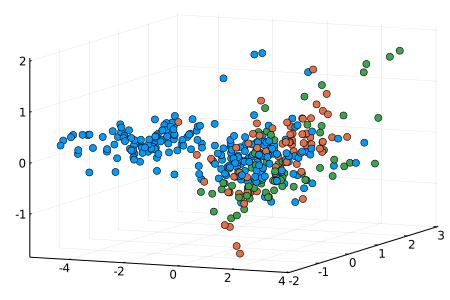

In [64]:
p = fit(PCA,data',maxoutdim=3)
Yte = MultivariateStats.transform(p, data')
scatter3d(Yte[1,:],Yte[2,:],Yte[3,:],color=uniqueids,legend=false,size=(450,300))

Esta es una gráfica en 3D, pero no podemos mover la gráfica en 3D. Usemos otro paquete para este propósito. Usaremos a Mackie.

<div align="center">
  <h2> 3.2 T-SNE </h2>
</div>
<p style='text-align: justify;' > 
 La incrustación de vecinos estocásticos distribuidos en T (t-SNE) es un algoritmo de aprendizaje automático para visualización desarrollado por Laurens van der Maaten y Geoffrey Hinton. Es una técnica de reducción de dimensionalidad no lineal muy adecuada para incrustar datos de alta dimensión para visualización en un espacio de baja dimensión de dos o tres dimensiones. Específicamente, modela cada objeto de alta dimensión por un punto bidimensional o tridimensional de tal manera que objetos similares son modelados por puntos cercanos y objetos diferentes son modelados por puntos distantes con alta probabilidad.
</p>

In [67]:
Pkg.add("ScikitLearn")
using ScikitLearn

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
┌ Info: Precompiling ScikitLearn [3646fa90-6ef7-5e7e-9f22-8aca16db6324]
└ @ Base loading.jl:1260


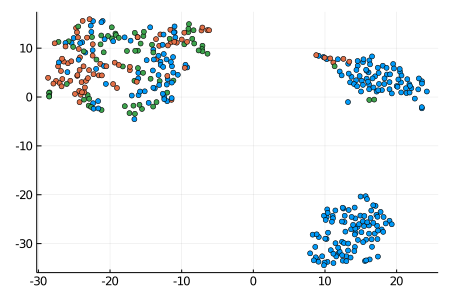

In [91]:
@sk_import manifold : TSNE
tfn = TSNE(n_components=2) #,perplexity=20.0,early_exaggeration=50)
Y2 = tfn.fit_transform(data);
Plots.scatter(Y2[:,1],Y2[:,2],color=uniqueids,legend=false,size=(450,300),markersize=3)

<div align="center">
  <h2> 3.3 UMAP </h2>
</div>
<p style='text-align: justify;' > 
 UMAP se construye a partir de un marco teórico basado en la geometría de Riemann y la topología algebraica. El resultado es un algoritmo práctico escalable que se aplica a datos del mundo real. El algoritmo UMAP es competitivo con t-SNE para la calidad de visualización, y posiblemente conserva más de la estructura global con un rendimiento superior en tiempo de ejecución. Además, UMAP como se describe no tiene restricciones computacionales en la dimensión de inclusión, por lo que es viable como una técnica de reducción de dimensión de propósito general para el aprendizaje automático.
</p>

In [72]:
#Adjuntamos y usamos las bibliotécas necesarias de UMAP
Pkg.add("UMAP")
using UMAP

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
┌ Info: Precompiling UMAP [c4f8c510-2410-5be4-91d7-4fbaeb39457e]
└ @ Base loading.jl:1260


In [73]:
L = cor(data,data,dims=2)
embedding = umap(L, 2)

2×392 Array{Float64,2}:
 -8.82075  -8.30925  -8.54566  …  6.52131   1.4257  5.92756  6.08112
 -5.18657  -4.98514  -5.79417     3.73698  -1.2399  4.45074  4.34043

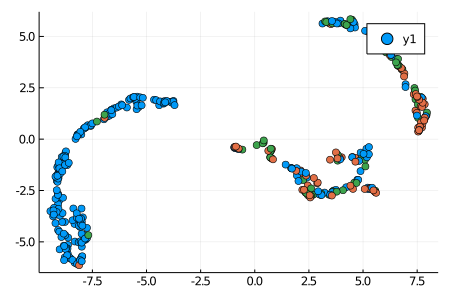

In [78]:
Plots.scatter(embedding[1,:],embedding[2,:],color=uniqueids, size=(450,300))

Para UMAP, podemos crear distancias entre cada par de observaciones de manera diferente, si así lo decidimos. Pero incluso con ambas opciones, veremos que UMAP genera un patrón muy similar al que hemos observado con t-SNE y PCA.

In [80]:
Pkg.add("Distances")
using Distances

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
  [b4f34e82] + Distances v0.9.0
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


In [81]:
L = pairwise(Euclidean(), data, data,dims=1) 
embedding = umap(-L, 2)

2×392 Array{Float64,2}:
 -7.65465  -9.70414  -8.27179  -8.21964  …   6.73286   3.75758   3.57794
  1.57948  -1.01924   1.43773   1.39306     -5.11243  -3.89275  -4.10917

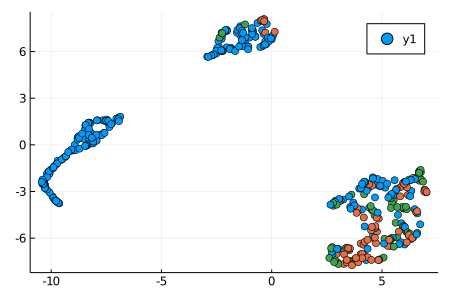

In [94]:
Plots.scatter(embedding[1,:],embedding[2,:],color=uniqueids,size=(450,300))

Todas las técnicas de reducción de dimensionalidad que utilizamos parecían estar de acuerdo en que los automóviles europeos y japoneses parecen tener especificaciones similares, mientras que los automóviles estadounidenses parecen formar sus propios dos grupos en función de sus especificaciones.

El azul son los autos americanos. El verde y el naranja son japoneses y europeos.